<a href="https://colab.research.google.com/github/kabir993/chandan-goswami-854331/blob/main/NLP_PROJECT_RESUME_SCREENING_APP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('/content/UpdatedResumeDataSet.csv')

In [3]:
dataset.head(5)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
dataset.shape

(962, 2)

In [9]:
dataset['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Blockchain,40
ETL Developer,40


<Axes: xlabel='count', ylabel='Category'>

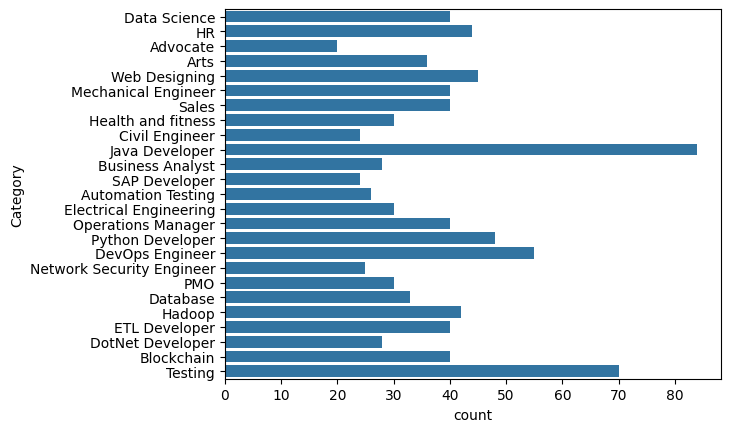

In [10]:
sns.countplot(dataset['Category'])

In [12]:
dataset['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

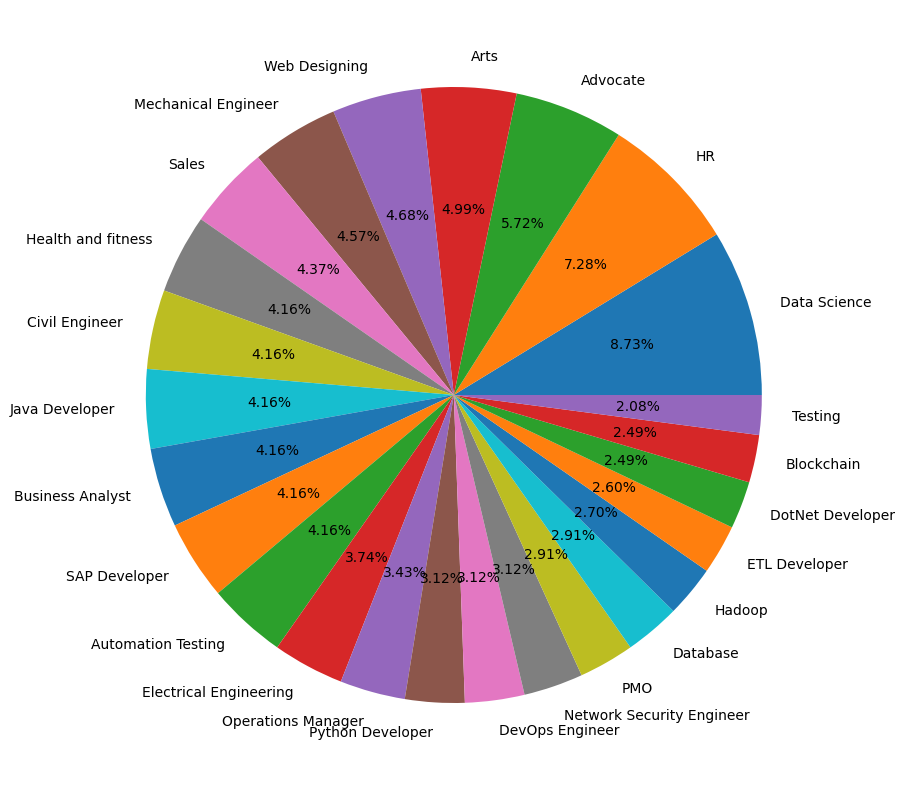

In [16]:
counts=dataset['Category'].value_counts()
labels=dataset['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts,labels=labels,autopct='%1.2f%%')
plt.show()

In [17]:
dataset['Category'][0]

'Data Science'

In [39]:
dataset['Resume'][99]

'QUALIFICATION Introduction to Computer EXTRAEducation Details January 2001 to January 2003 Master Law Chennai Tamil Nadu Dr Ambedkar Law University January 1998 to January 2001 Bachelor Law Chennai Tamil Nadu Dr Ambedkar Law University January 1995 to January 1998 Bachelor English Literature Tirunelveli Tamil Nadu Manonmaniam Sundaranar university Advocate Advocate Skill Details Company Details company Practiced description at High Court of Judicature at Madras India City Civil Court Chennai Debt Recovery Tribunal Chennai Consumer Forums Chennai Labour Courts Small Causes Courts Rent control Courts Legal advisor for Christian Institute of Management Chennai in 2016 Legal Advisor for Ruah church Chennai and NESSA Trust till 2018'

#cleaning data
*mentions
*special letters
*   urls
*   hastags
*punctuations


In [26]:
import re
def cleanResume(text):
  cleantext=re.sub('http\S+\s',' ',text)
  cleantext=re.sub('RT|cc',' ',cleantext)
  cleantext=re.sub('#\S+',' ',cleantext)
  cleantext=re.sub('@\S+',' ',cleantext)
  cleantext=re.sub('[%s]'%re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),' ',cleantext)
  cleantext=re.sub(r'[^\x00-\x7f]',' ',cleantext)
  cleantext=re.sub('\s+',' ',cleantext)
  return cleantext

In [27]:
dataset['Resume']=dataset['Resume'].apply(lambda x:cleanResume(x))

In [36]:
dataset['Resume'][44]

'Education Details June 2012 to May 2015 B A Economics Chennai Tamil Nadu Sdnbvc Hr Skill Details Company Details company Anything IT Solution description Hr'

In [40]:
#words into categorical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['Category']=le.fit_transform(dataset['Category'])

In [48]:
dataset.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

#vactorization

In [49]:
dataset['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [55]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english')
tfidf.fit(dataset['Resume'])
required_text = tfidf.transform(dataset['Resume'])

In [58]:
#splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(required_text,dataset['Category'],test_size=0.2,random_state=0)

In [59]:
x_train.shape

(769, 7351)

In [60]:
x_test.shape

(193, 7351)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
clf=OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train,y_train)
ypred=clf.predict(x_test)
print (accuracy_score(y_test,ypred))

0.9792746113989638


In [65]:
#prediction system
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(clf,open('model.pkl','wb'))

In [78]:
# Function to predict the category of a resume
def pred(input_resume):
    # Preprocess the input text (e.g., cleaning, etc.)
    cleaned_text = cleanResume(input_resume)

    # Vectorize the cleaned text using the same TF-IDF vectorizer used during training
    vectorized_text = tfidf.transform([cleaned_text])

    # Convert sparse matrix to dense
    vectorized_text = vectorized_text.toarray()

    # Prediction
    # Use clf for prediction instead of svc_model
    predicted_category = clf.predict(vectorized_text)

    # get name of predicted category
    predicted_category_name = le.inverse_transform(predicted_category)

    return predicted_category_name[0]  # Return the category name

In [79]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

pred(myresume)

'Data Science'

In [80]:
myresume = """
Jane Smith is a certified personal trainer with over 5 years of experience in helping individuals achieve their fitness goals. Specializing in weight loss, strength training, and sports conditioning, Jane has developed personalized workout routines for clients of all ages and fitness levels. She has extensive knowledge in nutrition and exercise science, and uses this to create holistic health and fitness programs that are tailored to individual needs.

Jane holds a degree in Exercise Science and is a certified trainer through the National Academy of Sports Medicine (NASM). She has worked with athletes, seniors, and individuals with chronic health conditions, helping them improve their physical well-being and overall quality of life.

Her expertise includes:
- Weight Loss and Body Composition
- Strength Training and Resistance Exercises
- Cardio Conditioning
- Nutrition Coaching and Meal Planning
- Injury Prevention and Rehabilitation
- Functional Movement and Flexibility Training
- Group Fitness Classes

Certifications:
- Certified Personal Trainer, NASM
- CPR and First Aid Certified
- Yoga Instructor (200-Hour Certification)

Education:
BSc in Exercise Science, ABC University, 2014-2018

Work Experience:
- Personal Trainer at XYZ Fitness Gym (2018-Present)
- Fitness Coach at Wellness Center (2016-2018)

Languages:
- English (Fluent)
- Spanish (Conversational)
"""

# Now, test the model with the Health and Fitness-focused resume
pred(myresume)

'Health and fitness'

In [81]:
myresume = """
John Doe is an experienced Network Security Engineer with over 7 years of expertise in designing, implementing, and managing network security infrastructures. Specializing in safeguarding critical network systems, John has worked with various organizations to protect against cyber threats, data breaches, and unauthorized access. He is proficient in deploying firewalls, intrusion detection systems (IDS), VPNs, and network monitoring tools to ensure the integrity and security of networks.

John holds a degree in Computer Science and certifications in several cybersecurity domains, including Certified Information Systems Security Professional (CISSP), Certified Ethical Hacker (CEH), and Cisco Certified Network Associate (CCNA). He has extensive experience in troubleshooting and resolving network vulnerabilities, and has played a key role in conducting security audits and risk assessments.

Key Skills:
- Network Security Architecture
- Firewall Management and Configuration
- Intrusion Detection and Prevention Systems (IDS/IPS)
- Virtual Private Networks (VPNs)
- Security Audits and Risk Assessments
- Cybersecurity Incident Response
- Network Monitoring and Traffic Analysis
- Vulnerability Assessment and Penetration Testing
- Data Encryption and Secure Communications

Certifications:
- CISSP (Certified Information Systems Security Professional)
- CEH (Certified Ethical Hacker)
- CCNA (Cisco Certified Network Associate)
- CompTIA Security+

Education:
BSc in Computer Science, XYZ University, 2012-2016

Professional Experience:
- Network Security Engineer at ABC Corp (2016-Present)
- IT Security Specialist at DEF Solutions (2014-2016)

Languages:
- English (Fluent)
- French (Intermediate)
"""

# Now, test the model with the Network Security Engineer-focused resume
pred(myresume)

'Network Security Engineer'

In [82]:
myresume="""About me
EDUCATION
I AM AN ASPIRING DATA SCIENTIST WITH A SOLID FOUNDATION IN PYTHON AND A DEEP
PASSION FOR MY WORK. I SPECIALIZE IN BUILDING PREDICTIVE MODELS AND LEVERAGING
MACHINE LEARNING TECHNIQUES TO EXTRACT VALUABLE INSIGHTS FROM DATA.
Movie recommender system-(ML-project)
Fraud detection-(ML-classification project)
Insurance Prediction-(ML-regression project)
Resume analyser using NLP
Customer churn prediction using (ANN-Deep Learning project)
Loan status prediction-(ML-project)
Super market analysis-(ML-project-clustering)
CAPSTONE-PROJECTS
TECHNICAL ADVISOR IN CONCENTRIX IN CONVERGYS INDIA SERVICES PRIVATE LIMITED. INTERNSHIP AS A
LECTURER IN ALFAMETIS INSTITUTE FOR GENERAL STUDIES SUBJECT
EXPERINCE
IGNOU-Indira Gandhi National Open University,New Delhi JUNE-2019-JAN2023
B.A.G in History,Sociology
Training- “Advanced Certification In Data Science and Artificial Intelligence”
Certification link-https://drive.google.com/file/d/1qJPvEuJnYye6fy7ycmOa4x_1f0j-zlTA/view?usp=drive_link
CHANDAN GOSWAMI
TECHNICAL SKILLS
EXPERIENCE
Programming Languages: Python, SQL
Data Analysis Tools: Pandas, NumPy, Scikit-learn, matplotlib,seaborn
Machine learning-Linear Regression, Root Mean Square Error, Ridge and Lasso Regression,
Polynomial Linear Regression, Support Vector Regression, Support Vector Machine (SVM)
Classification, Decision Tree Classification, Decision Tree Regression, Random Forest Classification,
Random Forest Regression, K Nearest Neighbor Classification, K Nearest Neighbor Regression, Naïve
Bayes Classifier, Save & Load Machine Learning Model
Deep learning-deep learning -Understanding Neural Networks, Activation Functions (e.g., ReLU,
Sigmoid), Gradient Descent, Feedforward and Backpropagation, Training and Testing Models,
Convolutional Neural Networks (CNNs) Basics, Data Preprocessing, Handling Overfitting (e.g.,
Dropout), Basic Model Evaluation Metrics (Accuracy, Precision, Recall), Using Deep Learning Libraries
(e.g., TensorFlow, Keras, PyTorch), Introduction to GPUs, Fundamentals of Model Deployment
NLP-Natural Language Processing
+91-6207279834 | chandangoswami854331@gmail.com |
www.linkedin.com/in/chandan-goswami-3372aa251
GITHUB-https://github.com/kabir993"""
pred(myresume)


'Data Science'